In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import math

TAMANO_LOTE=32
#Cargar datos de MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [2]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Hacer categorias
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

#Normalizar datos
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [3]:
#Aumento de datos

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
   
)

datagen.fit(X_train)

Modelo 1

In [4]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


history = modelo.fit(X_train,Y_train, epochs=60, validation_data = (X_test,Y_test),steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE))))



Epoch 1/60
1875/1875 [==============================] - 13s 2ms/step - loss: 0.2927 - accuracy: 0.9152 - val_loss: 0.1498 - val_accuracy: 0.9532
Epoch 2/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1359 - accuracy: 0.9587 - val_loss: 0.1124 - val_accuracy: 0.9650
Epoch 3/60
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0998 - accuracy: 0.9699 - val_loss: 0.1071 - val_accuracy: 0.9641
Epoch 4/60
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.0960 - val_accuracy: 0.9689
Epoch 5/60
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0874 - val_accuracy: 0.9714
Epoch 6/60
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0922 - val_accuracy: 0.9710
Epoch 7/60
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0883 - val_accuracy

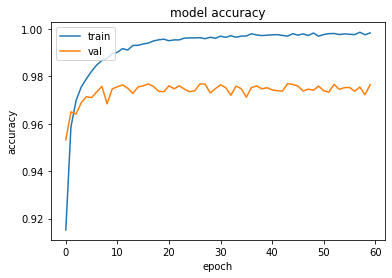

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



In [5]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred = modelo.predict(X_test, batch_size=10)
predicted = np.argmax(pred, axis=1)
predicted = to_categorical(predicted)
report = classification_report(Y_test, predicted)
print(report)
modelo.save('modelo1.h5')

Modelo 2

In [6]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
historial = modelo.fit(
    X_train,Y_train,
    epochs=15,
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1339 - accuracy: 0.9591
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0461 - accuracy: 0.9854
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0110 - accuracy: 0.9963
Epoch 8/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 9/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 10/15
1875/1875 [==============================] - 24s 13m

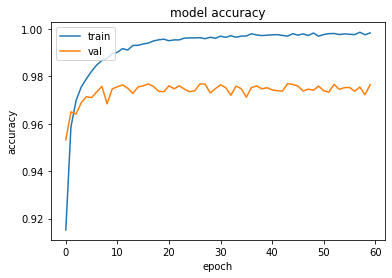

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [7]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred = modelo.predict(X_test, batch_size=10)
predicted = np.argmax(pred, axis=1)
predicted = to_categorical(predicted)
report = classification_report(Y_test, predicted)
print(report)
modelo.save('modelo2.h5')

Modelo 3

In [8]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
historial = modelo.fit(
    X_train,Y_train,
    epochs=30,
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

Epoch 1/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2106 - accuracy: 0.9349
Epoch 2/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0728 - accuracy: 0.9777
Epoch 3/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 4/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 5/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 6/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 7/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 8/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 9/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 10/30
1875/1875 [==============================] - 25s 13m

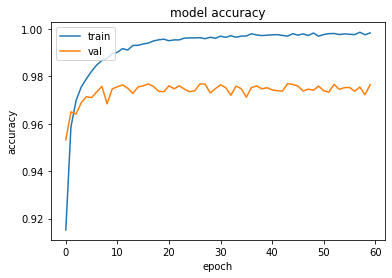

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [9]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred = modelo.predict(X_test, batch_size=10)
predicted = np.argmax(pred, axis=1)
predicted = to_categorical(predicted)
report = classification_report(Y_test, predicted)
print(report)
modelo.save('modelo3.h5')

Modelo 4

In [10]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
historial = modelo.fit(
    X_train,Y_train,
    epochs=60,
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

Epoch 1/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1912 - accuracy: 0.9416
Epoch 2/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0647 - accuracy: 0.9796
Epoch 3/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0453 - accuracy: 0.9858
Epoch 4/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 5/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 6/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0221 - accuracy: 0.9928
Epoch 7/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 8/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 9/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 10/60
1875/1875 [==============================] - 26s 14m

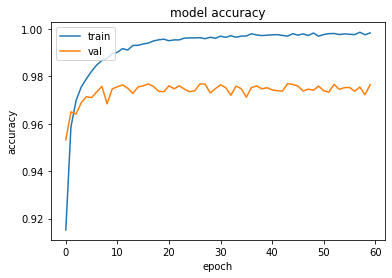

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [11]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred = modelo.predict(X_test, batch_size=10)
predicted = np.argmax(pred, axis=1)
predicted = to_categorical(predicted)
report = classification_report(Y_test, predicted)
print(report)
modelo.save('modelo4.h5')

Modelo 5

In [12]:
#Modelo Numero 5
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])


modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#Generar datos
data_gen_entrenamiento = datagen.flow(X_train, Y_train, batch_size=32)

In [14]:
TAMANO_LOTE = 32

#Se entrena la red

history = modelo.fit(data_gen_entrenamiento,epochs=60,batch_size=TAMANO_LOTE,validation_data=(X_test, Y_test),steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE))))

#history = modelo.fit(data_gen_entrenamiento,epochs=60,batch_size=TAMANO_LOTE,validation_data=(X_val, y_val),steps_per_epoch=64,validation_steps=10)




Epoch 1/60
1875/1875 [==============================] - 47s 25ms/step - loss: 1.1065 - accuracy: 0.6286 - val_loss: 0.1910 - val_accuracy: 0.9493
Epoch 2/60
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6288 - accuracy: 0.7979 - val_loss: 0.1034 - val_accuracy: 0.9685
Epoch 3/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5221 - accuracy: 0.8303 - val_loss: 0.0970 - val_accuracy: 0.9693
Epoch 4/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4749 - accuracy: 0.8473 - val_loss: 0.0909 - val_accuracy: 0.9714
Epoch 5/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4279 - accuracy: 0.8628 - val_loss: 0.0685 - val_accuracy: 0.9775
Epoch 6/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4050 - accuracy: 0.8675 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 7/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3863 - accuracy: 0.8747 - val_loss: 0.0556 -

Epoch 57/60
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2370 - accuracy: 0.9239 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 58/60
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2313 - accuracy: 0.9259 - val_loss: 0.0564 - val_accuracy: 0.9835
Epoch 59/60
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2304 - accuracy: 0.9264 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 60/60
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2384 - accuracy: 0.9231 - val_loss: 0.0524 - val_accuracy: 0.9840


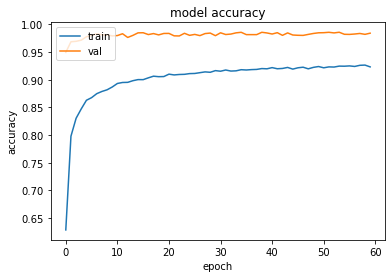

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.95      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



In [15]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred = modelo.predict(X_test, batch_size=10)
predicted = np.argmax(pred, axis=1)
predicted = to_categorical(predicted)
report = classification_report(Y_test, predicted)
print(report)
modelo.save('modelo5.h5')